In [87]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import warnings
warnings.filterwarnings("ignore")

In [60]:
df= pd.read_csv('Country-data.csv')
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


# EDA

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [62]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [63]:
#checking for null values
df.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

there are no null values inside the dataset

In [64]:
# splitting data according to socio economic and health factor 
x= df[['income','health']]

In [65]:
x.head()

,income,health
0,1610,7.58
1,9930,6.55
2,12900,4.17
3,5900,2.85
4,19100,6.03


# k-means clustering

In [66]:
#Elbow method to find optimal number of clusters
inertia= []
K= range(1,10)
for i in K:
    model= KMeans(n_clusters=i)
    model.fit(x)
    inertia.append(model.inertia_)

Text(0, 0.5, 'inertia')

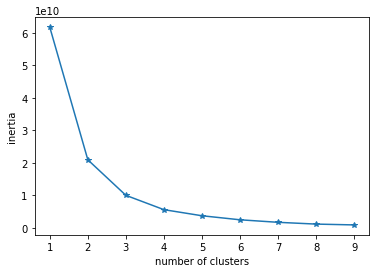

In [67]:
plt.plot(K, inertia,'-*')
plt.xlabel('number of clusters')
plt.ylabel('inertia')

here number of cluster is 4

In [68]:
kmeans_model= KMeans(n_clusters=4)

In [69]:
kmeans_model.fit(x)

KMeans(n_clusters=4)

In [70]:
labels= kmeans_model.predict(x)

In [71]:
x['cluster']= labels

In [93]:
x.head()

,income,health,cluster
0,1610,7.58,1
1,9930,6.55,1
2,12900,4.17,0
3,5900,2.85,1
4,19100,6.03,0


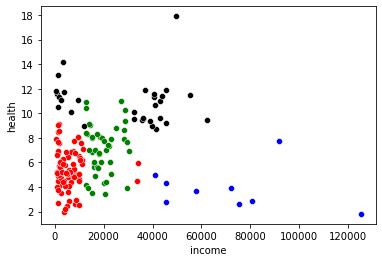

In [92]:
cluster_0= x[x['cluster']==0]
cluster_1= x[x['cluster']==1]
cluster_2= x[x['cluster']==2]
cluster_3= x[x['cluster']==3]
sns.scatterplot(cluster_0['income'], cluster_0['health'],color= 'green')
sns.scatterplot(cluster_1['income'], cluster_1['health'],color= 'red')
sns.scatterplot(cluster_2['income'], cluster_2['health'],color= 'blue')
sns.scatterplot(cluster_3['income'], cluster_3['health'],color= 'black')
plt.show()

As per clustering we can clearly see that countries in cluster 1 needs help from the NGO since that countries are suffering from socio economic and health constraints